In [12]:
import pandas as pd
from pathlib import Path
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
def load_systems_dataframe(ulx_only=False, beamed=False, half_opening_l_45=False):
    systems_df_path = Path('../../processed/all_systems_df.csv')
    df = pd.read_csv(systems_df_path)
    if ulx_only:
        df = df[df['Lx'] > 1E39]
    if beamed:
        df = df[df['b'] < 1]
    if half_opening_l_45:
        df = df[df['theta_half_deg'] < 45]
        
    df = df.drop(['Unnamed: 0'], axis=1)
    return df

In [4]:
systems_df = load_systems_dataframe(True, True, True)

In [5]:
systems_df

,mdot,m,Z,tage,is_bh,mdot_gs,LEdd,MEdd,mdot_ratio,XLsph,...,r_isco_nospin,r_isco,r_sph,r_out,P_inflow_at_rsph,P_envelope,P_wind,P_inflow_days,P_envelope_days,P_wind_days
3,36.00,24.6,0.0002,10,1,2.268994e+21,2.952000e+39,3.936000e+19,57.647201,9.090313e+41,...,6.0,6,345.883207,6.561990e+04,1.229021e+03,4.423554e+07,3.854791e+09,0.014225,5.119854e+02,4.461564e+04
27,11.00,24.6,0.0002,10,1,6.933037e+20,2.952000e+39,3.936000e+19,17.614423,6.496234e+40,...,6.0,6,105.686536,4.391670e+03,4.382400e+01,7.567147e+04,1.623069e+06,0.000507,8.758272e-01,1.878552e+01
28,26.00,8.2,0.0002,10,1,1.638718e+21,9.840000e+38,1.312000e+19,124.902269,1.640068e+42,...,6.0,6,749.413616,3.040184e+05,3.600274e+03,5.925052e+08,1.097213e+11,0.041670,6.857699e+03,1.269923e+06
37,430.00,22.7,0.0002,10,1,2.710187e+22,2.724000e+39,3.632000e+19,746.196885,2.117506e+44,...,6.0,6,4477.181310,1.081385e+07,1.582409e+06,9.231461e+12,1.028067e+16,18.314923,1.068456e+08,1.189892e+11
40,9.50,13.8,0.0002,10,1,5.987623e+20,1.656000e+39,2.208000e+19,27.117856,9.600644e+40,...,6.0,6,162.707137,1.545581e+04,8.301593e+01,7.490860e+05,3.342826e+07,0.000961,8.669977e+00,3.869012e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,1.20,1.3,0.0020,100,0,7.563313e+19,1.560000e+38,2.080000e+18,36.362081,1.737040e+40,...,6.0,6,218.172485,2.679876e+04,1.778998e+04,2.684140e+08,1.531714e+10,0.205903,3.106643e+03,1.772817e+05
2937,0.72,1.3,0.0020,100,0,4.537988e+19,1.560000e+38,2.080000e+18,21.817248,5.557936e+39,...,6.0,6,130.903491,8.344963e+03,4.230791e+03,1.719364e+07,5.362503e+08,0.048967,1.990005e+02,6.206600e+03
3796,0.54,1.3,0.0002,200,0,3.403491e+19,1.560000e+38,2.080000e+18,16.362936,2.906046e+39,...,6.0,6,98.177618,3.520531e+03,1.875517e+03,2.411639e+06,4.558038e+07,0.021707,2.791249e+01,5.275507e+02
4073,1.30,1.3,0.0002,200,0,8.193589e+19,1.560000e+38,2.080000e+18,39.392254,2.074132e+40,...,6.0,6,236.353525,3.124718e+04,2.227027e+04,3.892450e+08,2.384751e+10,0.257758,4.505151e+03,2.760129e+05


In [8]:
res_df = pd.read_csv('../../processed/curve_classications.csv')

In [9]:
res_df

,system_id,theta,dincl,inclination,lc_min,lc_max,N_lim,classification
0,3,12.03,0,0,22.130920,22.130920,0.032583,alive
1,3,12.03,0,1,22.416954,22.416954,0.032583,alive
2,3,12.03,0,2,22.629745,22.629745,0.032583,alive
3,3,12.03,0,3,22.745117,22.745117,0.032583,alive
4,3,12.03,0,4,22.950842,22.950842,0.032583,alive
...,...,...,...,...,...,...,...,...
514873,17261,4.58,45,86,0.000004,0.474002,0.320879,transient
514874,17261,4.58,45,87,0.000004,0.447798,0.320879,transient
514875,17261,4.58,45,88,0.000004,0.410134,0.320879,transient
514876,17261,4.58,45,89,0.000004,0.387256,0.320879,transient


In [10]:
df_a = res_df[res_df['classification']=='alive']
df_t = res_df[res_df['classification']=='transient']
df_d = res_df[res_df['classification']=='dead']

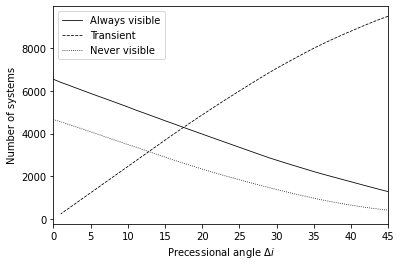

In [13]:
df_a['dincl'].value_counts().plot(label='Always visible', linestyle='-', color='black', linewidth=0.8)
df_t['dincl'].value_counts().plot(label='Transient', linestyle='--', color='black', linewidth=0.8)
df_d['dincl'].value_counts().plot(label='Never visible', linestyle='dotted', color='black', linewidth=0.8)
plt.xlim(0,45)

plt.xlabel(r'Precessional angle $\Delta i$')
plt.ylabel(r'Number of systems')

plt.legend()


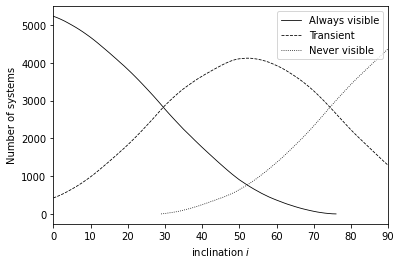

In [14]:
df_a['inclination'].value_counts().sort_index().plot(label='Always visible', linestyle='-', color='black', linewidth=0.8)
df_t['inclination'].value_counts().sort_index().plot(label='Transient', linestyle='--', color='black', linewidth=0.8)
df_d['inclination'].value_counts().sort_index().plot(label='Never visible', linestyle='dotted', color='black', linewidth=0.8)
plt.xlim(0,90)

plt.xlabel(r'inclination $i$')
plt.ylabel(r'Number of systems')

plt.legend()


In [39]:
import matplotlib.pyplot as plt

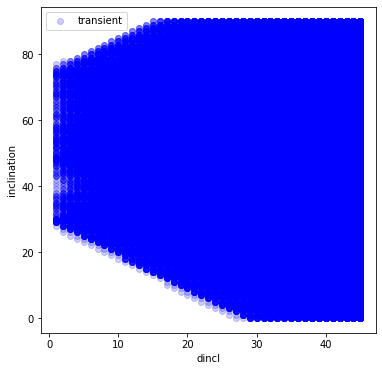

In [16]:
plt.figure(figsize=(6,6))
plt.xlabel('dincl')
plt.ylabel('inclination')

# plt.scatter(df_a['dincl'], df_a['inclination'], c='g', label='alive', alpha=0.2)
plt.scatter(df_t['dincl'], df_t['inclination'], c='b', label='transient', alpha=0.2)
# plt.scatter(df_d['dincl'], df_d['inclination'], c='grey', label='dead', alpha=0.2)
plt.legend()

